# Startup Funding Analysis 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Dataset/startup_funding.csv")

In [3]:
df.shape

(2372, 10)

In [4]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [5]:
df['InvestmentType'] = df['InvestmentType'].astype("category")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SNo               2372 non-null   int64   
 1   Date              2372 non-null   object  
 2   StartupName       2372 non-null   object  
 3   IndustryVertical  2201 non-null   object  
 4   SubVertical       1436 non-null   object  
 5   CityLocation      2193 non-null   object  
 6   InvestorsName     2364 non-null   object  
 7   InvestmentType    2371 non-null   category
 8   AmountInUSD       1525 non-null   object  
 9   Remarks           419 non-null    object  
dtypes: category(1), int64(1), object(8)
memory usage: 169.6+ KB


# Data Cleaning

__Preprocessing__
- Remarks Col: has Mostly null Values (Drop)
- setting Index to sno
- rename Column with easy names
- convert amount to crore in Rs
- date col
- dropna (drop Null values)

In [7]:
#1 drop Remarks Col
df=df.drop(columns=["Remarks"],axis=1)



#2  Index =SNo
df.set_index('SNo',inplace=True)

#3 rename COlumns
df.rename(columns={"StartupName":"startup",
                   "IndustryVertical":'vertical',
                   'SubVertical':'subvertical',
                   'CityLocation':"city",
                   'InvestorsName':'investor',
                   'InvestmentType':'round',
                   'AmountInUSD':"amount"
                   },inplace=True)
#4 convert amount to crore
# first there are so many Nan values change them to 0
df['amount']=df['amount'].fillna('0')
print(df['amount'].isnull().sum())

# now change the type of the amount 
df['amount']=df['amount'].str.replace(",",'')

# Convert the column to numeric (may be float and int)
df['amount']=pd.to_numeric(df['amount'])
df.head(4)


0


,Date,startup,vertical,subvertical,city,investor,round,amount
SNo,,,,,,,,
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000


In [8]:
# converting the amount to crore
def ConverterToCr(dollar):
    inr=dollar * 82.5
    return inr/10000000

df['amount']=df['amount'].apply(ConverterToCr)


In [9]:
df['amount'].iloc[0:3]

SNo
0    10.725
1     0.000
2     0.000
Name: amount, dtype: float64

In [10]:
# 5 date to datetime obj 
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce', dayfirst=True)

__it helps to get the day ,month,year from the date__

In [11]:
df['Date'].dt.month.head()

SNo
0    8.0
1    8.0
2    8.0
3    8.0
4    8.0
Name: Date, dtype: float64

In [12]:
df['Date'].dt.year.head()

SNo
0    2017.0
1    2017.0
2    2017.0
3    2017.0
4    2017.0
Name: Date, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2372 entries, 0 to 2371
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2367 non-null   datetime64[ns]
 1   startup      2372 non-null   object        
 2   vertical     2201 non-null   object        
 3   subvertical  1436 non-null   object        
 4   city         2193 non-null   object        
 5   investor     2364 non-null   object        
 6   round        2371 non-null   category      
 7   amount       2372 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(5)
memory usage: 150.9+ KB


In [14]:
# 6 drop the missing value rows
df=df.dropna(subset=['Date','vertical','city','investor','round','amount'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2181 entries, 0 to 2200
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2181 non-null   datetime64[ns]
 1   startup      2181 non-null   object        
 2   vertical     2181 non-null   object        
 3   subvertical  1428 non-null   object        
 4   city         2181 non-null   object        
 5   investor     2181 non-null   object        
 6   round        2181 non-null   category      
 7   amount       2181 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(5)
memory usage: 138.8+ KB


# Export this data for Streamlit Version

In [16]:
df.to_csv("Startup_Cleaned.csv",index=False)

# Univariate Analysis

# __Investor COlumn Analysis__

__To find the Inverstor Funding in Startups__

__Analysis: Investor-Wise Total Funding (With Equal Split Per Deal)__

In the dataset, each row contains:

- A startup’s total funding amount  
- A list of investors (often more than one, separated by commas or stored as a list)

__We want to:__

1. Identify each individual investor from the list  
2. Split the funding amount **equally** among the investors for that funding round  
3. Calculate the **total funding per investor**

__Steps to Perform__

1. **Preprocess the Data**  
   - Handle missing values in the investor column  
   - Split the investor strings into lists (using `.str.split(',')` if needed)

2. **Calculate Per-Investor Funding**  
   - Count the number of investors in each row  
   - Divide the funding amount by the number of investors to get the per-investor share

3. **Use `explode()` to Unnest Investor Lists**  
   - Convert the list of investors in each row into individual rows using `df.explode()`

4. **Aggregate Total Funding by Investor**  
   - Group the exploded data by investor name  
   - Sum the `per-investor` funding amount across all rounds



In [17]:
df_for_investor=df.copy()
df_for_investor['investor']=df_for_investor['investor'].str.split(",")
df_for_investor['Investor_num']=df_for_investor['investor'].apply(len)
df_for_investor['amount_per_investor']=df_for_investor['amount']/ df_for_investor['Investor_num']
df_for_investor.head()


,Date,startup,vertical,subvertical,city,investor,round,amount,Investor_num,amount_per_investor
SNo,,,,,,,,,,
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,[Kae Capital],Private Equity,10.7250,1,10.72500
1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,[Triton Investment Advisors],Private Equity,0.0000,1,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"[Kashyap Deorah, Anand Sankeshwar, Deepak Ja...",Seed Funding,0.0000,7,0.00000
3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"[Kunal Shah, LetsVenture, Anupam Mittal, He...",Seed Funding,4.1250,4,1.03125
4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"[Narottam Thudi, Shireesh Palle]",Seed Funding,7.0125,2,3.50625


In [18]:
# Explode helps us to split the column that contains (list of Items) to Different rows (according to each item)
# explode() is used to transform a list-like column (e.g., a column where each row contains a list) 
# into multiple rows, one per list element.

# Think of it as “flattening” a column that contains lists.

df_for_investor=df_for_investor.explode('investor')
df_for_investor.head(10)

,Date,startup,vertical,subvertical,city,investor,round,amount,Investor_num,amount_per_investor
SNo,,,,,,,,,,
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,10.725,1,10.72500
1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0.000,1,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Kashyap Deorah,Seed Funding,0.000,7,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Anand Sankeshwar,Seed Funding,0.000,7,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Deepak Jain,Seed Funding,0.000,7,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Sadashiva NT,Seed Funding,0.000,7,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Arjun Mehta,Seed Funding,0.000,7,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Satish Kaul,Seed Funding,0.000,7,0.00000
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,Anindya Ghose,Seed Funding,0.000,7,0.00000


In [19]:
requirement=df_for_investor.groupby("investor")['amount_per_investor'].sum().sort_values(ascending=False)
requirement.head()

investor
SoftBank Group                              12267.75
Steadview Capital and existing investors     5775.00
Microsoft                                    3850.00
 eBay                                        3850.00
 Tencent Holdings                            3850.00
Name: amount_per_investor, dtype: float64

<Axes: xlabel='investor'>

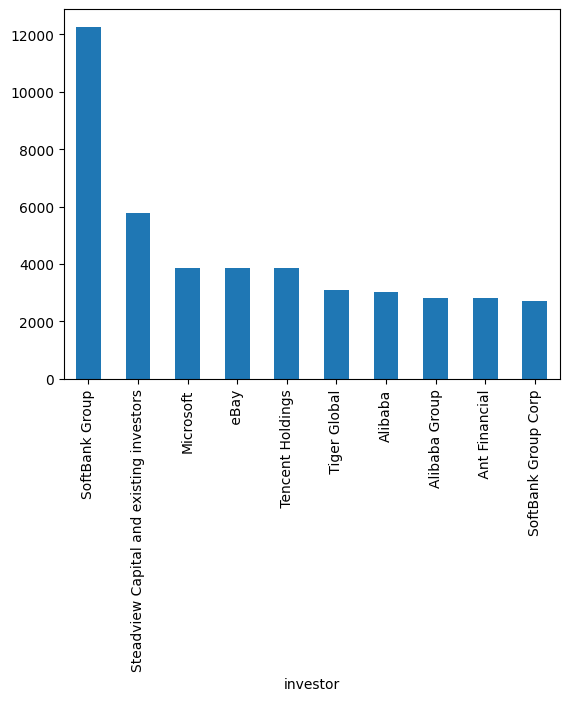

In [20]:
# Top 10 Investors 
requirement.head(10).plot(kind='bar')

In [21]:
requirement.head(10)

investor
SoftBank Group                              12267.75000
Steadview Capital and existing investors     5775.00000
Microsoft                                    3850.00000
 eBay                                        3850.00000
 Tencent Holdings                            3850.00000
 Tiger Global                                3087.90625
Alibaba                                      3025.00000
Alibaba Group                                2805.00000
 Ant Financial                               2805.00000
SoftBank Group Corp                          2722.50000
Name: amount_per_investor, dtype: float64

In [22]:
top_10_inverstors=pd.DataFrame(requirement.head(10))
top_10_inverstors 

,amount_per_investor
investor,
SoftBank Group,12267.75000
Steadview Capital and existing investors,5775.00000
Microsoft,3850.00000
eBay,3850.00000
Tencent Holdings,3850.00000
Tiger Global,3087.90625
Alibaba,3025.00000
Alibaba Group,2805.00000
Ant Financial,2805.00000


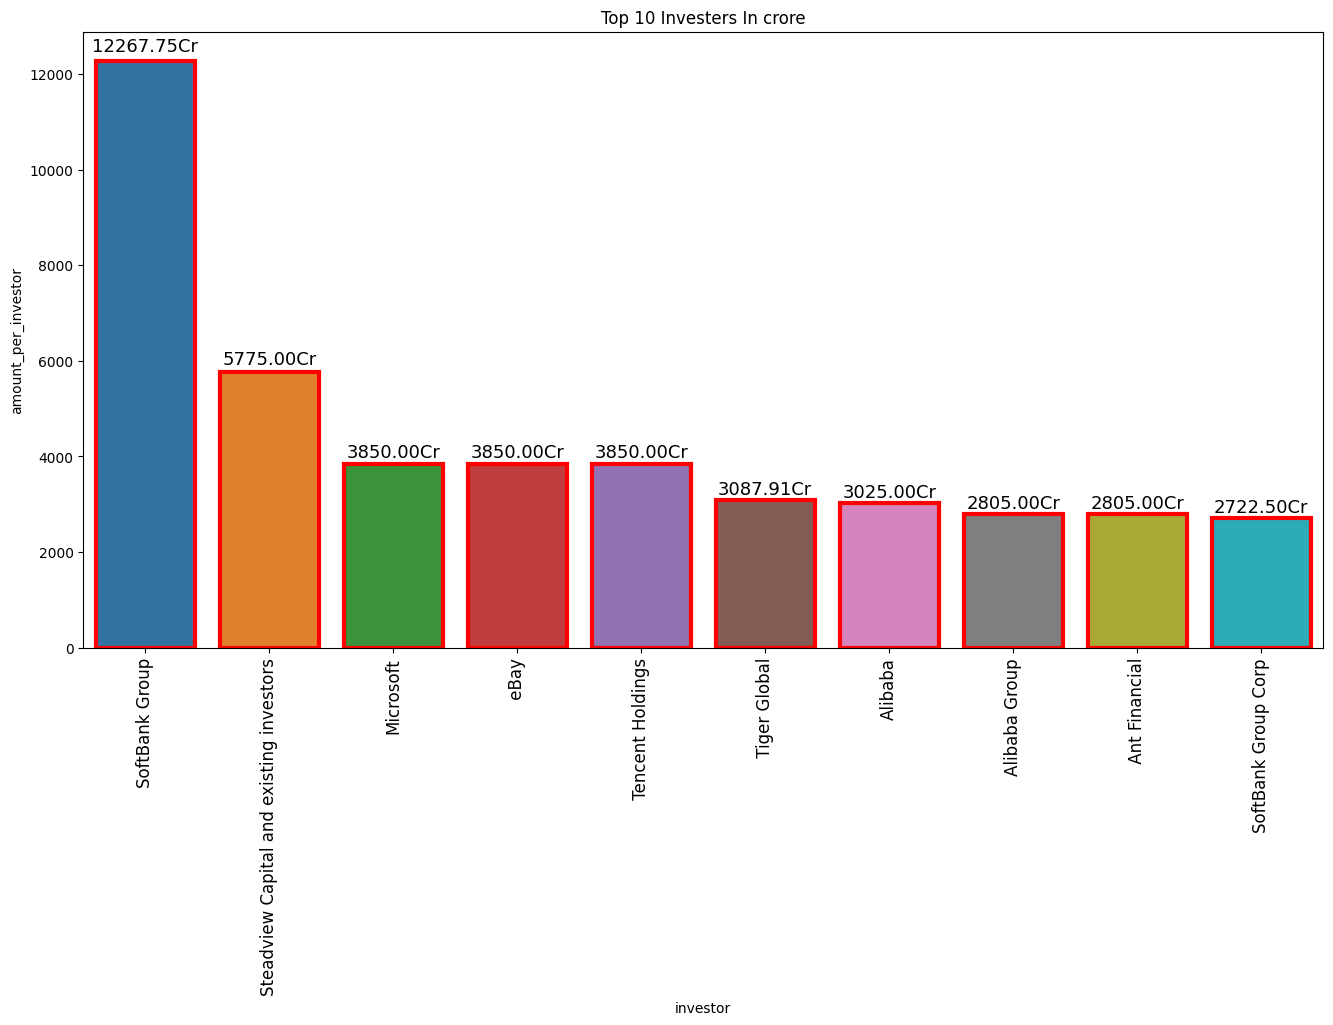

In [23]:
plt.figure(figsize=(16,8))
plt.title("Top 10 Investers In crore")

ax=sns.barplot(data=top_10_inverstors,edgecolor='red',linewidth=3,x='investor',y='amount_per_investor',hue='investor')

plt.xticks(rotation=90,fontsize=12)
for i in ax.patches:
    height=i.get_height()
    ax.text(
        i.get_x() + i.get_width()/2 ,
        height + 0.01*height,
        f'{height:.2f}Cr',
        fontsize=13,
        color='black',
        ha='center',
        va='bottom'
    )

In [24]:
# least 10 Investors 
least_10=pd.DataFrame(requirement[requirement>0]).sort_values(by="amount_per_investor")
least_10

,amount_per_investor
investor,
Saurab Paruthi,0.0825
Lalit Mangal,0.0825
Arihant Patni,0.0825
Singapore Angel Network.,0.0825
Samir Bangara,0.0825
...,...
Microsoft,3850.0000
eBay,3850.0000
Tencent Holdings,3850.0000


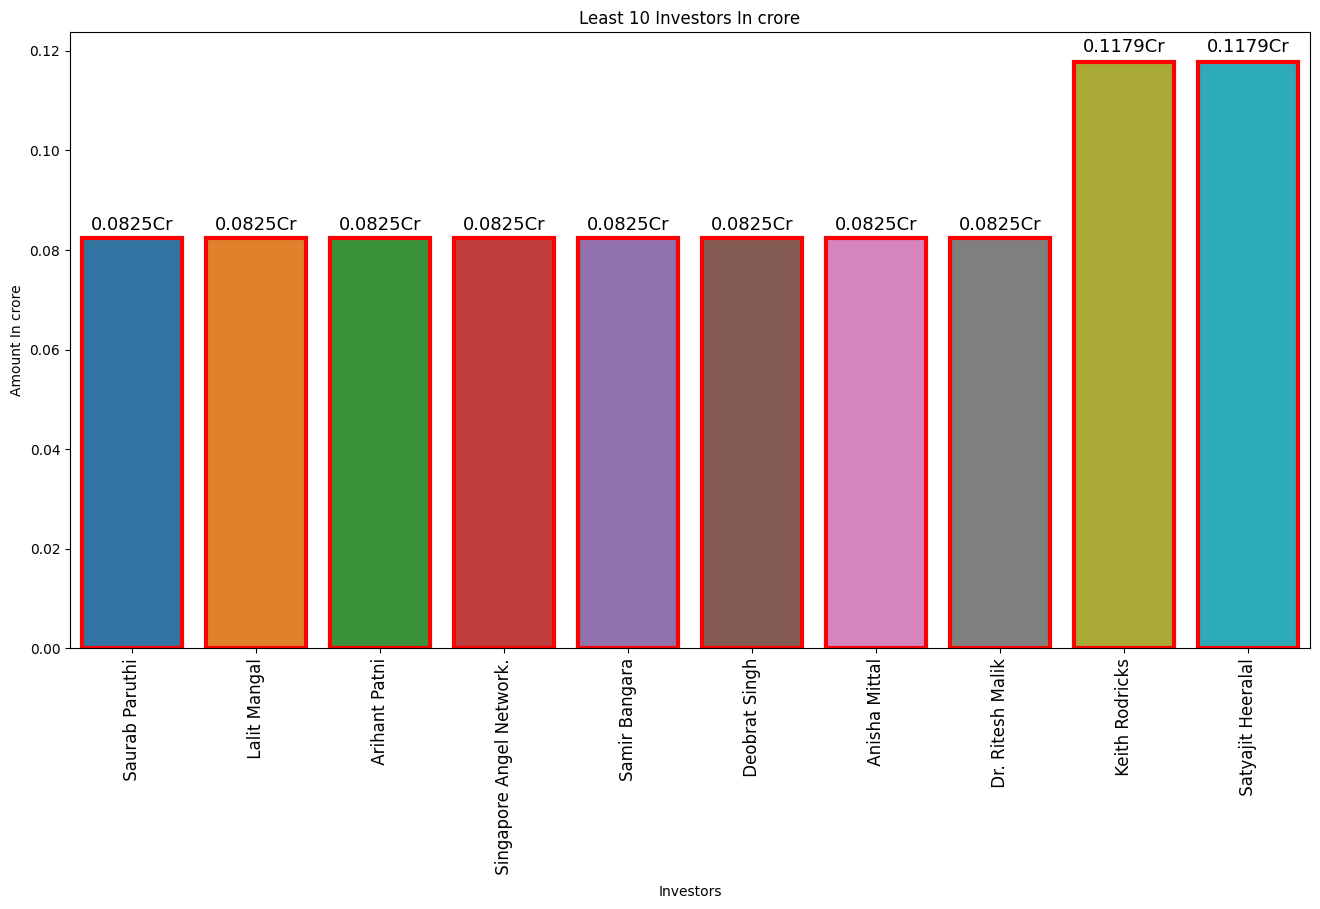

In [25]:
plt.figure(figsize=(16,8))
plt.title("Least 10 Investors In crore")
plt.ylabel("Amount In crore")
plt.xlabel("Investors")
ax=sns.barplot(data=least_10.head(10),edgecolor='red',linewidth=3,x='investor',y='amount_per_investor',hue='investor')

plt.xticks(rotation=90,fontsize=12)
for i in ax.patches:
    height=i.get_height()

    ax.text(
        i.get_x() + i.get_width()/2 ,
        height + 0.01*height,
        f'{height:.4f}Cr',
        fontsize=13,
        color='black',
        ha='center',
        va='bottom'
   )



# Single Investors Analysis

__find for =>  IDG Ventures__

In [26]:
# first Make List of all the Investors 
# then convert it to Set for (removing Duplicates)
# then sort it using sorted() method
# way to get the Unique (Investor list) from column (that have ELements in form of list)
x=sorted(set(df['investor'].str.split(",").sum()))


In [27]:
x[0:10]

['',
 ' & Others',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs']

In [28]:
len(x)
# TOtal number of Unique Investors

2703

In [29]:
# Lets find for specific investor from above list
# use .contains() to find the rows Which have That Investor Name
Investor_found=df[df['investor'].str.contains(" IDG Ventures")].loc[:,['Date','startup',"city",'investor','amount']]
Investor_found

,Date,startup,city,investor,amount
SNo,,,,,
291,2017-03-16,POPxo,New Delhi,"GREE Ventures, Kalaari Capital and IDG Venture...",25.575
339,2017-02-13,Sigtuple,Bangalore,"Accel Partners, IDG Ventures, Endiya Partners,...",47.850
538,2016-11-14,Active.ai,Singapore,"Kalaari Capital, IDG Ventures India",24.750
542,2016-11-15,PlaySimple,Bangalore,"SAIF Partners, IDG Ventures India",33.000
722,2016-09-23,CloudCherry,Chennai,"Vertex Ventures, Cisco Ventures, IDG Ventures",49.500
833,2016-07-04,Curefit,Bangalore,"Accel Partners, IDG Ventures, Kalaari Capital",123.750
863,2016-07-13,RentMojo,Bangalore,"Accel Partners, IDG Ventures India",41.250
1000,2016-05-04,Lenskart,New Delhi,"International Finance Corp, TPG Growth, Adveq ...",495.000
1260,2016-02-08,Xpressbees,Pune,"SAIF Partners, IDG Ventures India, Vertex Vent...",103.125


In [30]:
# grouping the startup column with amount because the single Investor may invest in same Company(startup) again
# then sum the amount according to the startups name 
Investor_found.groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Lenskart                 495.000
Curefit                  123.750
Xpressbees               103.125
FirstCry.com              82.500
CloudCherry               49.500
Sigtuple                  47.850
RentMojo                  41.250
Aasaanjobs                41.250
PlaySimple                33.000
POPxo                     25.575
Active.ai                 24.750
Cloudcherry Analytics      8.250
Tripoto                    0.000
Name: amount, dtype: float64

Text(7, 445.5, 'IDG Ventures')

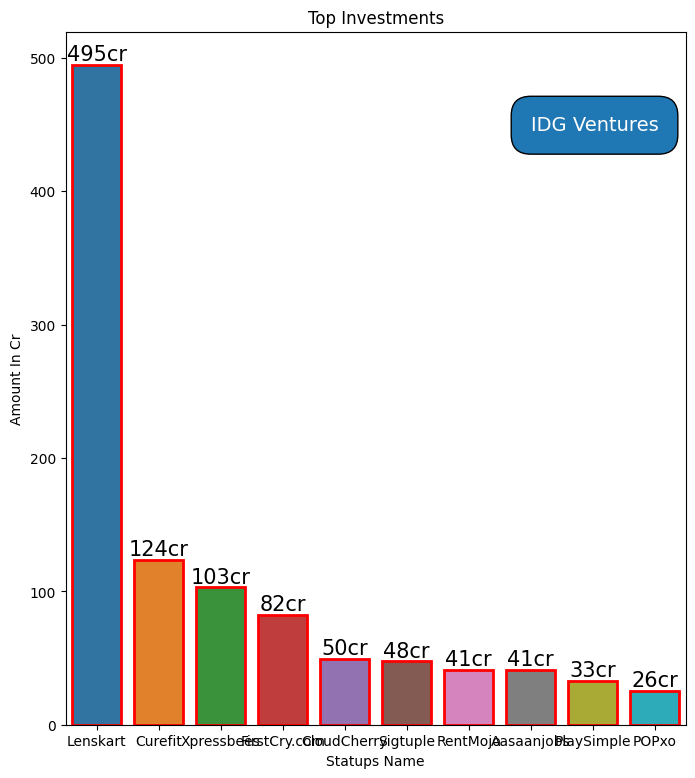

In [31]:
# plotting top 10 investments by  IDG Ventures in startups
fig=plt.figure(figsize=(8,9))
import seaborn as sns
req=df[df['investor'].str.contains(" IDG Ventures")].groupby('startup')['amount'].sum().sort_values(ascending=False).head(10).reset_index()
ax=sns.barplot(data=req,x='startup',y='amount',hue='startup',linewidth=2,edgecolor='red')

ax.set_title("Top Investments")
ax.set_ylabel("Amount In Cr")
ax.set_xlabel("Statups Name")
for i in ax.patches:
    height=i.get_height()
    ax.text(
        i.get_x()+i.get_width()/2,
        height,
        f'{height:.0f}cr',
        va='bottom',ha='center',
        fontsize=15
    )
ax.text(
    7,                        # x-coordinate (slightly outside the bar)
    max(req['amount']) * 0.9,         # y-coordinate (90% of max height)
    "IDG Ventures",             # Your custom label
    fontsize=14,
    color='white',
    bbox=dict( edgecolor='black', boxstyle='round,pad=1.0')
)

vertical
Consumer Internet                  4
Technology                         4
eCommerce                          2
ECommerce                          1
global community for travellers    1
CRM / Analytics platform           1
Name: count, dtype: int64


<Axes: ylabel='count'>

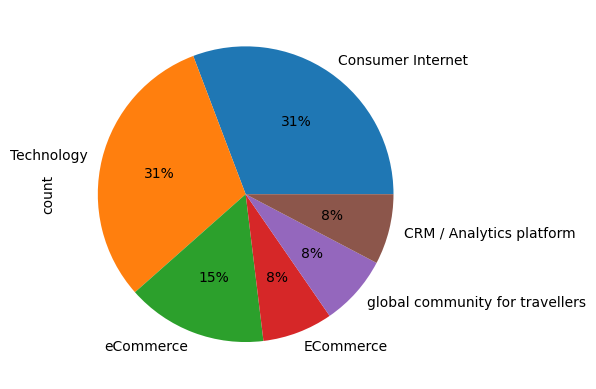

In [32]:
# To get the In which sector the Invester Invests (Its interest )
# How many times investor invest in particular sector
print(df[df['investor'].str.contains(" IDG Ventures")]['vertical'].value_counts())
df[df['investor'].str.contains(" IDG Ventures")]['vertical'].value_counts().plot(kind='pie', autopct=lambda p: '{:.0f}%'.format(p))


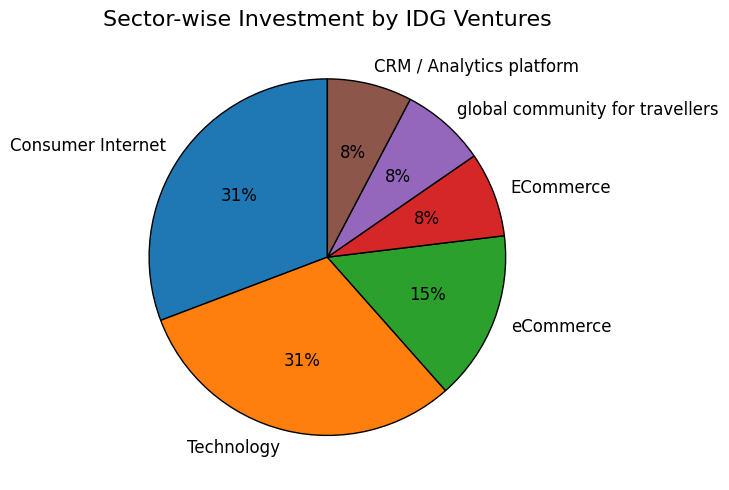

In [33]:
# more Better Vesion of Above
plt.figure(figsize=(8, 5))  # Increase the figure size
plt.title("Sector-wise Investment by IDG Ventures", fontsize=16)  # Add a title with larger font size

# Plot the pie chart with better spacing and larger font sizes
df[df['investor'].str.contains(" IDG Ventures")]['vertical'].value_counts().plot(
    kind='pie',
    autopct=lambda p: '{:.0f}%'.format(p),
    textprops={'fontsize': 12},  
    startangle=90,  
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}  
)

plt.ylabel('')  # Remove the default y-axis label
plt.tight_layout() 
plt.show()

                                  amount
vertical                                
CRM / Analytics platform           8.250
Consumer Internet                231.825
ECommerce                        103.125
Technology                       155.100
eCommerce                        577.500
global community for travellers    0.000


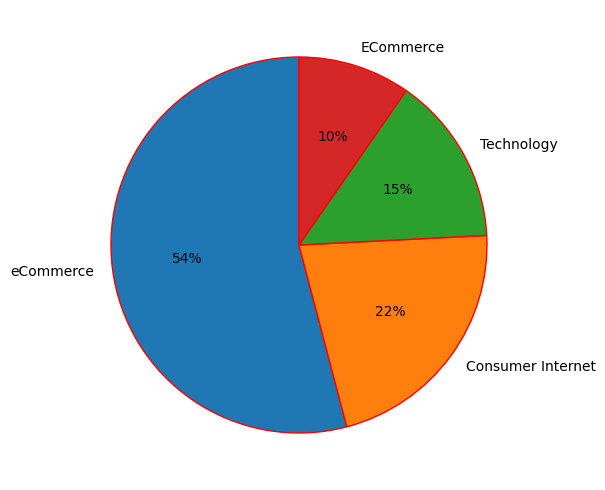

In [34]:
# similarly how much investor INvest in specific Sector
print(df[df['investor'].str.contains(" IDG Ventures")].groupby("vertical")['amount'].sum().to_frame())

fig=plt.figure(figsize=(8,5))
df[df['investor'].str.contains(" IDG Ventures")].groupby("vertical")['amount'].sum().sort_values(ascending=False).head(4).plot(kind='pie',autopct=lambda p:'{:.0f}%'.format(p),startangle=90,
                                                                                          wedgeprops={'linewidth':1,'edgecolor':'red'})
plt.ylabel("")
plt.tight_layout()
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_10876\2638547335.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['investor'].str.contains(" IDG Ventures")].groupby('round')['amount'].sum().sort_values(ascending=False).head(4).plot(kind='pie',autopct=lambda p:'{:.0f}%'.format(p) if p>0 else '')


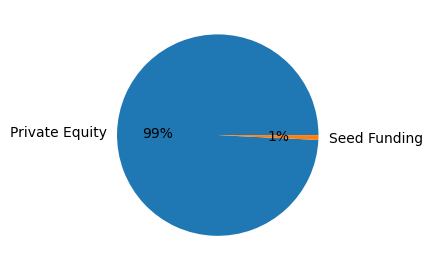

In [35]:
# for Investor Round 
fig=plt.figure(figsize=(4,3.5))
df[df['investor'].str.contains(" IDG Ventures")].groupby('round')['amount'].sum().sort_values(ascending=False).head(4).plot(kind='pie',autopct=lambda p:'{:.0f}%'.format(p) if p>0 else '')
plt.ylabel("")
plt.tight_layout()
plt.show()

<Axes: xlabel='Year', ylabel='amount'>

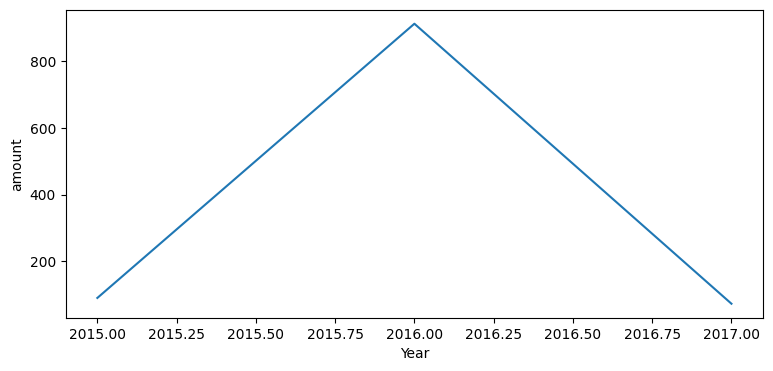

In [49]:
#

date_wise_investor=df[df['investor'].str.contains(" IDG Ventures")].sort_values(by='Date')
date_wise_investor['Year']=date_wise_investor['Date'].dt.year
fg,ax=plt.subplots(figsize=(9,4))
sns.lineplot(data=date_wise_investor.groupby("Year")['amount'].sum())
# date_wise_investor.groupby('Year')['amount'].sum().plot()

# __Overall Analysis__

1. __Total Amount Funded in our India Startups System__

In [51]:
df['amount'].sum()

np.float64(140812.671516)

2. __Max Amount Funded in Which Company__

In [64]:
df.groupby("startup")['amount'].sum().sort_values(ascending=False).reset_index()

,startup,amount
0,Paytm,17655.000
1,Flipkart,12867.525
2,Ola,8122.125
3,Flipkart.com,5775.000
4,Snapdeal,5775.000
...,...,...
1858,1Crowd,0.000
1859,underDOGS,0.000
1860,vImmune,0.000
1861,vPhrase Analytics,0.000


Text(0.5, 1.0, 'Top 10 Funded Companies(Startup)')

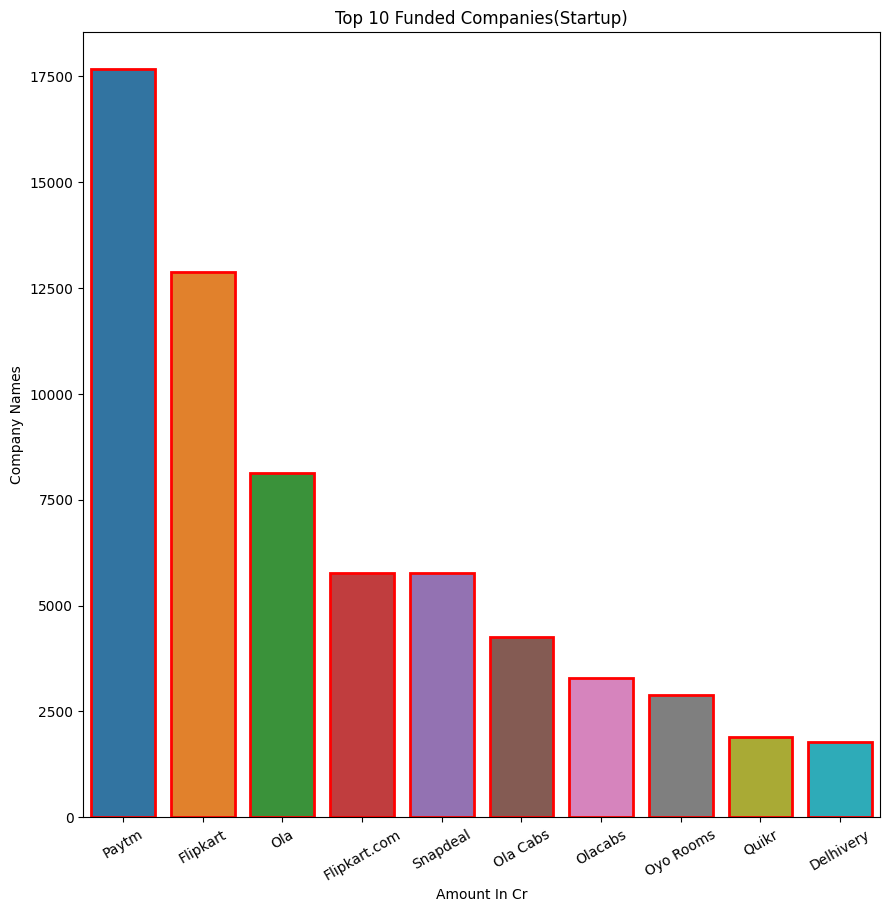

In [70]:
fig,ax=plt.subplots(figsize=(9,9))
sns.barplot(df.groupby("startup")['amount'].sum().sort_values(ascending=False).reset_index().head(10),x='startup',y='amount',hue='startup',linewidth=2,edgecolor='red')

plt.xticks(rotation=30)
plt.tight_layout()
plt.xlabel("Amount In Cr")
plt.ylabel("Company Names")
plt.title("Top 10 Funded Companies(Startup)")

3. __Month WIse Analysis of amount Funded in Startups per Year__

In [122]:
month_analysis=df.copy()
month_analysis['month']=month_analysis['Date'].dt.month
month_analysis['year']=month_analysis['Date'].dt.year
month_analysis.groupby(['year','month'])['amount'].sum()

year  month
2015  4         8080.875000
      5         2641.113750
      6         4302.325500
      7        13048.670250
      8         8776.482000
      9        12123.540000
      10        2103.428250
      11        7399.878750
      12        2523.287250
2016  1         5774.010000
      2         2734.796625
      3         2553.883266
      4         2095.005000
      5         2803.680000
      6         1647.021750
      7         1926.762750
      8         4406.234250
      9         1991.228250
      10        1958.946000
      11        2144.975250
      12        1544.754750
2017  1         2089.176375
      2         2433.411750
      3        18680.318250
      4         6042.258750
      5        14738.369250
      6         2842.818000
      7         1383.558000
      8           21.862500
Name: amount, dtype: float64

<Axes: xlabel='year,month'>

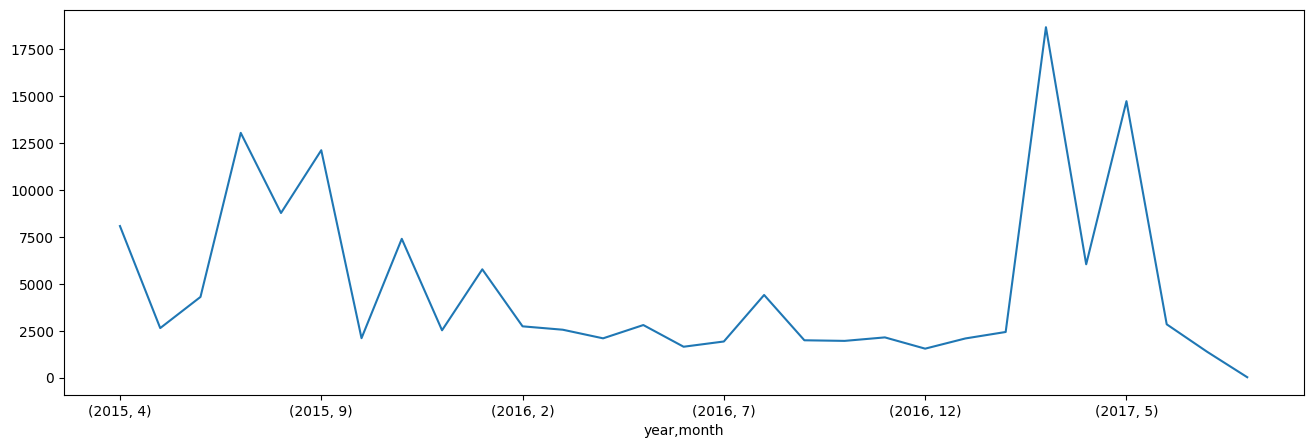

In [125]:
plt.subplots(figsize=(16,5))
month_analysis.groupby(['year','month'])['amount'].sum().plot()

4. __Month WIse Analysis of how many Times Funded in Startups Per year__

In [92]:
month_analysis.groupby(['year','month'])['startup'].count()

year  month
2015  4         61
      5         55
      6         84
      7         97
      8         98
      9         87
      10        93
      11        90
      12        88
2016  1        104
      2         99
      3         84
      4         77
      5         79
      6         97
      7         63
      8         87
      9         73
      10        80
      11        72
      12        72
2017  1         72
      2         48
      3         71
      4         71
      5         67
      6         65
      7         42
      8          5
Name: startup, dtype: int64

In [101]:
df[(df['Date'].dt.year==2015) & (df['Date'].dt.month==4)].shape

(61, 8)

<Axes: xlabel='year,month'>

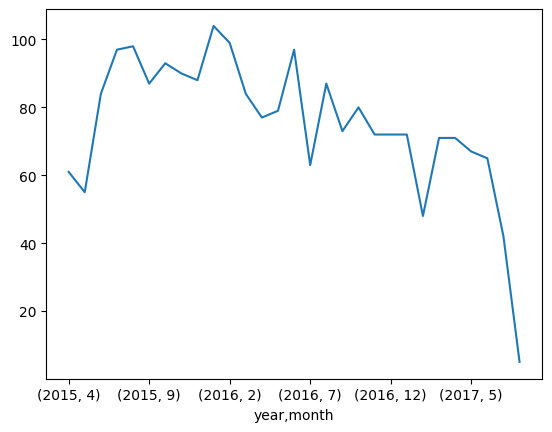

In [ ]:
plt.subplots(figsize=(16,5))
month_analysis.groupby(['year','month'])['startup'].count().plot()